<a href="https://colab.research.google.com/github/Flezra/STRUKTUR-DATA/blob/main/Graph_G_211_22_0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install networkx

In [8]:
pip install networkx matplotlib

Shortest distances from vertex A: {'A': 0, 'B': 1, 'C': 3, 'D': 4}
Shortest path from A to A: ['A', 'B', 'D']


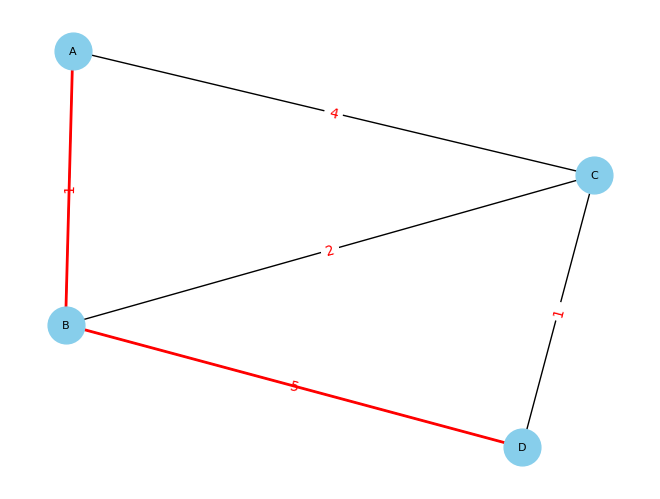

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = min(priority_queue)
        priority_queue.remove((current_distance, current_node))

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                priority_queue.append((distance, neighbor))

    return distances

def create_graph_with_shortest_path(graph, shortest_path):
    G = nx.Graph()

    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)

    edge_labels = {(node, neighbor): weight for node, neighbors in graph.items() for neighbor, weight in neighbors.items()}

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Highlight the shortest path
    shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

    plt.show()

# Example usage
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_vertex = 'A'
shortest_distances = dijkstra(graph, start_vertex)

print(f"Shortest distances from vertex {start_vertex}: {shortest_distances}")

end_vertex = 'D'
shortest_path = [end_vertex]
while end_vertex != start_vertex:
    end_vertex = min(graph[end_vertex], key=lambda x: shortest_distances[x])
    shortest_path.append(end_vertex)
shortest_path.reverse()

print(f"Shortest path from {start_vertex} to {end_vertex}: {shortest_path}")

create_graph_with_shortest_path(graph, shortest_path)
